# Atlanta Police Department ![APD Logo](https://atlantapd.galls.com/photos/partners/atlantapd/logo.jpg)


The Atlanta Police Department provides Part 1 crime data at http://www.atlantapd.org/crimedatadownloads.aspx

A recent copy of the data file is stored in the cluster. <span style="color: red; font-weight: bold;">Please, do not copy this data file into your home directory!</span>

In [94]:
### Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load data (don't change this if you're running the notebook on the cluster)

We have two files
- `/home/data/APD/COBRA083016_2015.xlsx` for 2015
- `/home/data/APD/COBRA083016.xlsx` from 2009 to current date

In [36]:
%%time
df = pd.read_excel('/home/data/APD/COBRA083016_2015.xlsx', sheetname='Query')

CPU times: user 6.89 s, sys: 28.7 ms, total: 6.92 s
Wall time: 6.92 s


In [26]:
df.columns

Index(['MI_PRINX', 'offense_id', 'rpt_date', 'occur_date', 'occur_time',
       'poss_date', 'poss_time', 'beat', 'apt_office_prefix', 'apt_office_num',
       'location', 'MinOfucr', 'MinOfibr_code', 'dispo_code',
       'MaxOfnum_victims', 'Shift', 'Avg Day', 'loc_type', 'UC2 Literal',
       'neighborhood', 'npu', 'x', 'y'],
      dtype='object')

In [27]:
df.describe()

/usr/lib64/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,MI_PRINX,offense_id,beat,MinOfucr,MaxOfnum_victims,loc_type,x,y
count,3.001100e+04,3.001100e+04,30011.000000,30011.000000,30011.000000,26903.000000,30011.000000,30011.000000
mean,4.361347e+06,1.518675e+08,359.417813,594.219886,1.194695,21.109356,-84.408346,33.756058
std,1.931052e+04,1.029128e+06,169.563281,114.321851,0.799062,16.579831,0.046894,0.045981
min,1.371687e+06,1.500101e+08,101.000000,210.000000,0.000000,1.000000,-84.546070,33.637450
25%,4.353944e+06,1.510128e+08,208.000000,512.000000,1.000000,NaN,-84.432445,33.729060
50%,4.361446e+06,1.518913e+08,401.000000,640.000000,1.000000,NaN,-84.398210,33.756000
75%,4.368948e+06,1.527329e+08,505.000000,670.000000,1.000000,NaN,-84.374420,33.781470
max,4.376451e+06,1.536580e+08,709.000000,730.000000,44.000000,99.000000,-84.290480,33.883250


In [38]:
df.offense_id.min(), df.offense_id.max()

(150010052, 153658045)

In [77]:
df.groupby(['UC2 Literal']).offense_id.count()

UC2 Literal
AGG ASSAULT             2111
AUTO THEFT              4234
BURGLARY-NONRES          817
BURGLARY-RESIDENCE      3921
LARCENY-FROM VEHICLE    9539
LARCENY-NON VEHICLE     7092
RAPE                     154
ROBBERY-COMMERCIAL       235
ROBBERY-PEDESTRIAN      1721
ROBBERY-RESIDENCE        187
Name: offense_id, dtype: int64

## Exploring Dates

In [44]:
df[['offense_id', 'occur_date', 'occur_time', 'rpt_date']][1:10]

,offense_id,occur_date,occur_time,rpt_date
207443,150010052,12/31/2014,22:00:00,01/01/2015
207444,150010079,01/01/2015,00:03:00,01/01/2015
207445,150010151,12/31/2014,23:45:00,01/01/2015
207446,150010214,01/01/2015,00:30:00,01/01/2015
207447,150010359,12/31/2014,21:00:00,01/01/2015
207448,150010370,12/31/2014,23:15:00,01/01/2015
207449,150010413,12/31/2014,23:00:00,01/01/2015
207450,150010417,01/01/2015,02:00:00,01/01/2015
207451,150010419,01/01/2015,01:50:00,01/01/2015


Convert into date-time type

In [65]:
df['occur_ts'] = pd.to_datetime(df.occur_date+' '+df.occur_time)

In [70]:
df[['offense_id', 'occur_date', 'occur_time', 'occur_ts', 'rpt_date']][1:10]

,offense_id,occur_date,occur_time,occur_ts,rpt_date
207443,150010052,12/31/2014,22:00:00,2014-12-31 22:00:00,01/01/2015
207444,150010079,01/01/2015,00:03:00,2015-01-01 00:03:00,01/01/2015
207445,150010151,12/31/2014,23:45:00,2014-12-31 23:45:00,01/01/2015
207446,150010214,01/01/2015,00:30:00,2015-01-01 00:30:00,01/01/2015
207447,150010359,12/31/2014,21:00:00,2014-12-31 21:00:00,01/01/2015
207448,150010370,12/31/2014,23:15:00,2014-12-31 23:15:00,01/01/2015
207449,150010413,12/31/2014,23:00:00,2014-12-31 23:00:00,01/01/2015
207450,150010417,01/01/2015,02:00:00,2015-01-01 02:00:00,01/01/2015
207451,150010419,01/01/2015,01:50:00,2015-01-01 01:50:00,01/01/2015


In [76]:
df['occur_month'] = df['occur_ts'].map(lambda x: x.month)
df['occur_woy'] = df.occur_ts.dt.weekofyear

In [80]:
resdf = df.groupby(['UC2 Literal', 'occur_month']).offense_id.count()
resdf

UC2 Literal         occur_month
AGG ASSAULT         1.0            156
                    2.0            139
                    3.0            189
                    4.0            191
                    5.0            182
                    6.0            205
                    7.0            201
                    8.0            209
                    9.0            176
                    10.0           172
                    11.0           142
                    12.0           149
AUTO THEFT          1.0            351
                    2.0            279
                    3.0            359
                    4.0            332
                    5.0            408
                    6.0            452
                    7.0            396
                    8.0            405
                    9.0            334
                    10.0           369
                    11.0           262
                    12.0           284
BURGLARY-NONRES     1.0         

In [89]:
resdf['BURGLARY-RESIDENCE'].as_matrix()

array([357, 232, 303, 311, 375, 323, 316, 292, 298, 340, 340, 432])

In [85]:
resdf['BURGLARY-RESIDENCE'].iloc(0)

'done'

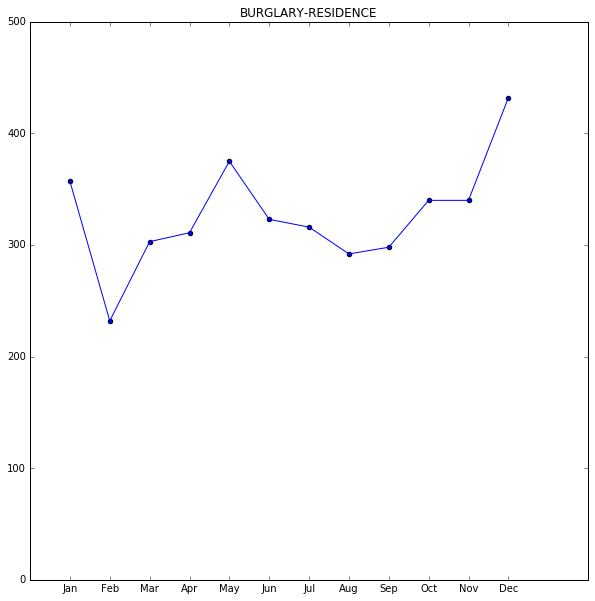

In [113]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
plt.plot(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'])
plt.scatter(resdf['BURGLARY-RESIDENCE'].index, resdf['BURGLARY-RESIDENCE'])
plt.ylim(0, 500)
plt.title('BURGLARY-RESIDENCE')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.savefig('BurglaryResidence_over_month.svg')
'done'

In [23]:
### in case we want to save a DataFrame
#writer = pd.ExcelWriter('myresults.xlsx')
#df.to_excel(writer,'Results')
#writer.save()